### Деревья решений (Decision Trees)
### Случайный лес (Random Forest)

## 1. Деревья решений (Decision Trees)

Дерево принятия решений (также может называться деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны атрибуты, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — атрибуты, по которым различаются случаи.  

Источники:
1. https://logic.pdmi.ras.ru/~sergey/oldsite/teaching/ml/notes-01-dectrees.pdf 
2. https://habr.com/ru/post/171759/
3. https://www.hse.ru/mirror/pubs/share/215285956

In [1]:
import numpy as np

import pandas as pd

import scipy as sp

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.linear_model import LogisticRegression    
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

### Вспомним: классификация на выборке ирисов kNN

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


## Решающее правило на KNN 

In [3]:
clf = KNeighborsClassifier()# почему у алгоритма нет random state?
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


In [4]:
clf = DecisionTreeClassifier(random_state = 0) # попробуйте еще и (random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


#### О чем говорит такая разность точности при изменении random_seeed?

-

Размерность данных, набор данных  "Ирисы":  (150, 4)
Размерность данных, уменьшенная до двух характеристик для отрисовки:  (150, 2)


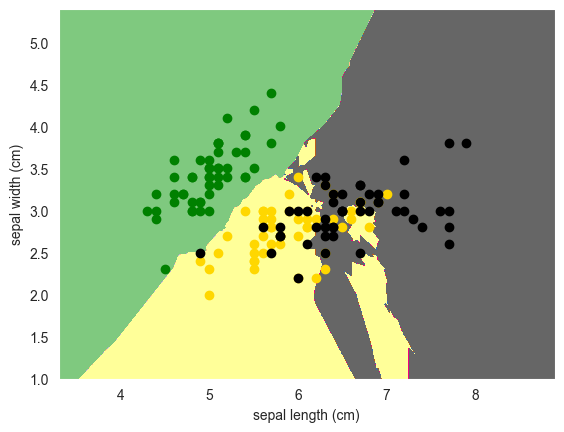

In [5]:
pair=[0, 1]
print ('Размерность данных, набор данных  "Ирисы": ', X.shape)
X = iris.data[:, [0, 1]]
y = iris.target
print ('Размерность данных, уменьшенная до двух характеристик для отрисовки: ', X.shape)

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = KNeighborsClassifier(n_neighbors=10).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired);

#### Посмотрим, как строит решающее правило Дерево Решений:

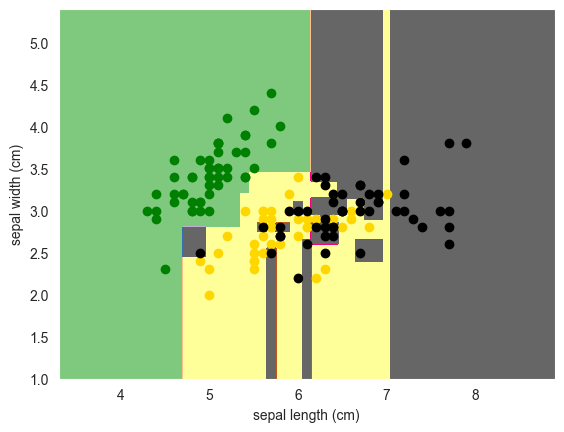

In [6]:
pair=[0, 1]
X = iris.data[:, [0, 1]]
y = iris.target

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = DecisionTreeClassifier(random_state=42).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])


for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired);

In [7]:
clf

DecisionTreeClassifier(random_state=42)

#### Деревья решений можно визуализировать:

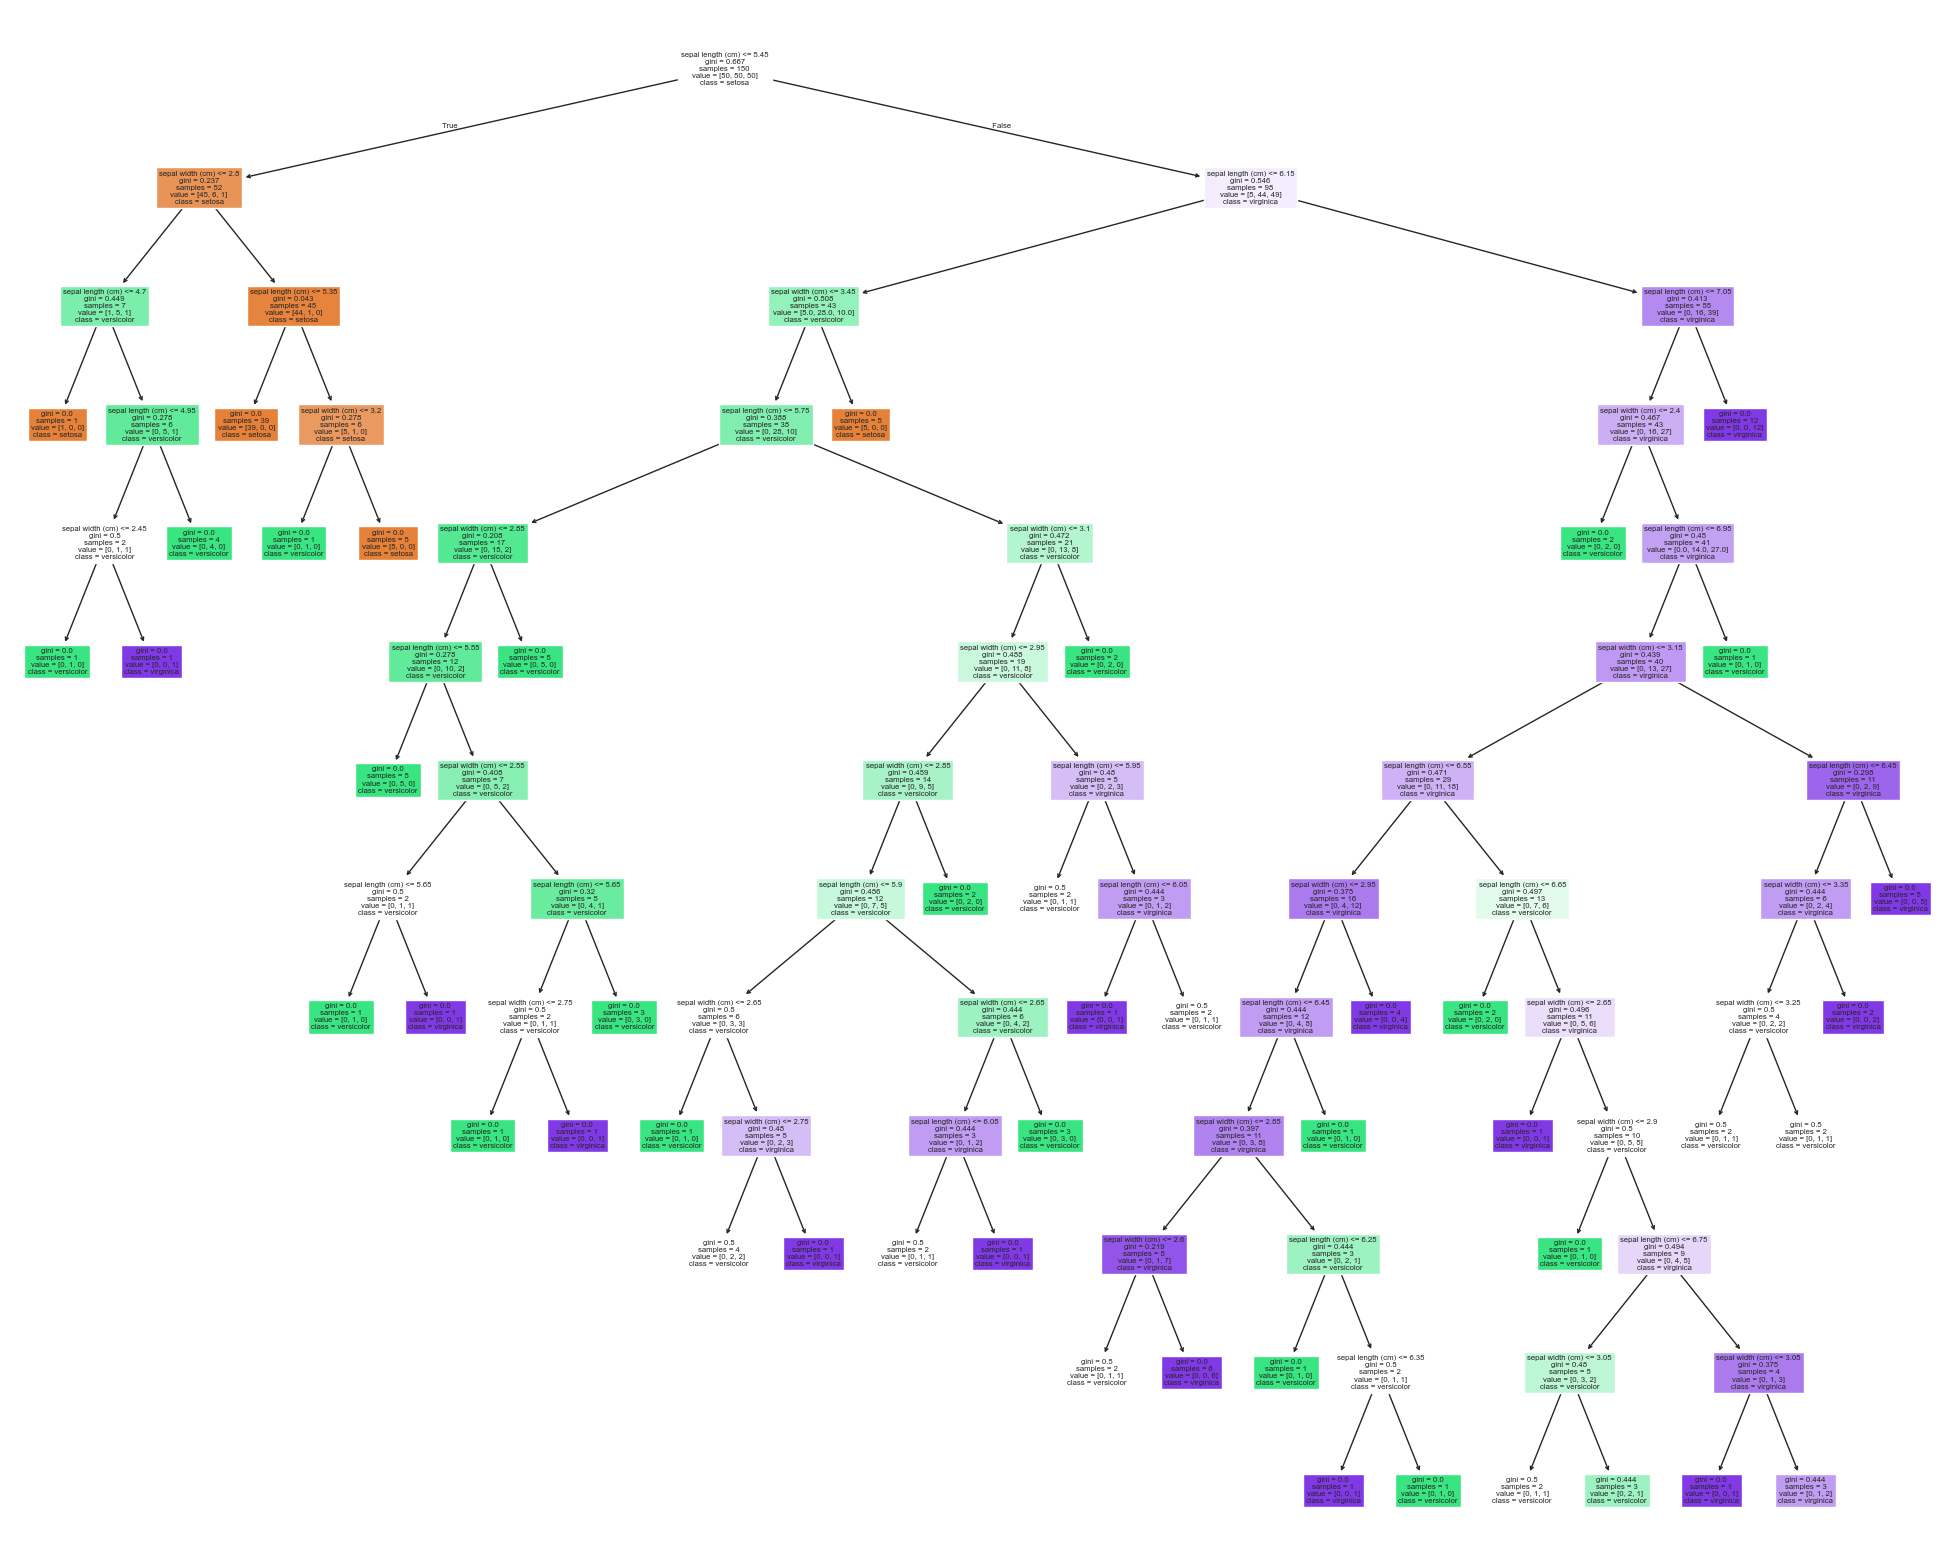

In [8]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [9]:
clf = LogisticRegression().fit(X_train, y_train)  # будем работать с первоначальным разбиением на train и test
print(clf.score(X_test, y_test))

0.9333333333333333


In [10]:
clf = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)  # min_samples_split --?

print(clf.score(X_test, y_test))

0.9333333333333333


In [11]:
clf = DecisionTreeClassifier(min_samples_leaf = 10, min_samples_split = 5, random_state = 42).fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.8888888888888888


Посмотрим на справку функции в `sklearn`:

Выбор критерия:
    http://www.machinelearning.ru/wiki/images/8/89/Sem3_trees.pdf

## Регрессия (Деревья Решений):

#### Если при классификации в листах стоят результирующие классы, при регрессии же стоит какое-то значение целевой функции.

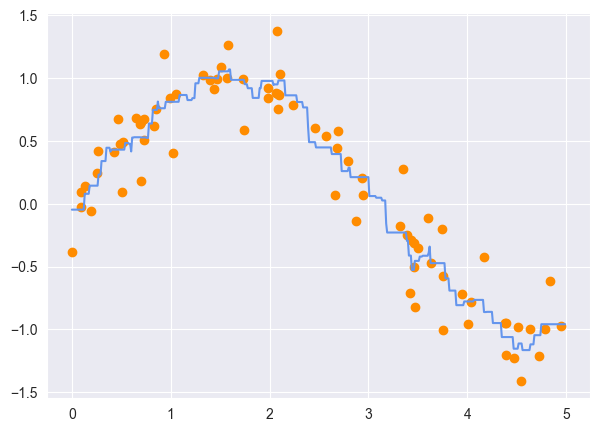

In [12]:
from sklearn.neighbors import KNeighborsRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() 
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = KNeighborsRegressor(n_neighbors = 5, 
                         ).fit(X, y)
y_rfc = clf.predict(X_test)
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_rfc , c='cornflowerblue', label='prediction');

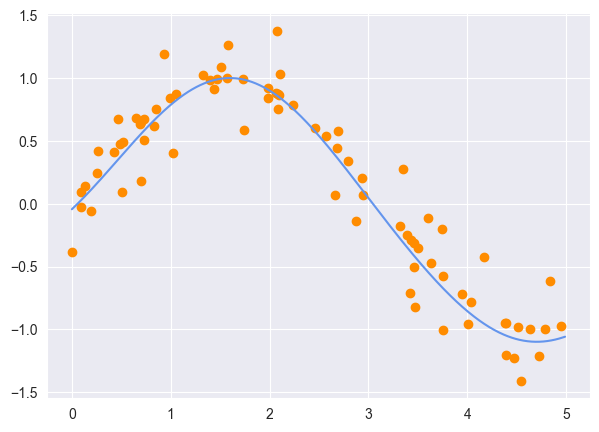

In [13]:
from sklearn.svm import SVR

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() 
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = SVR().fit(X, y)
y_svr = clf.predict(X_test)
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_svr, c='cornflowerblue', label='prediction');

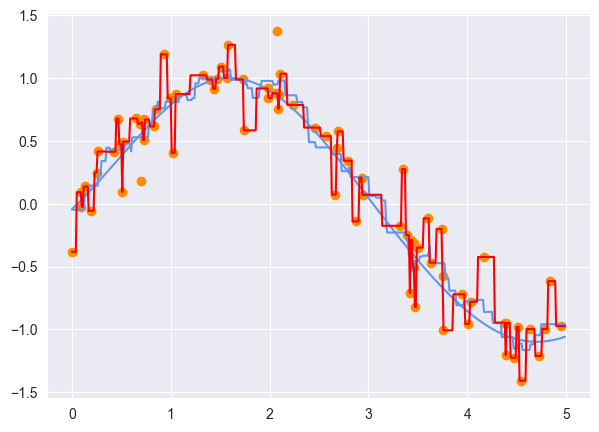

In [14]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = DecisionTreeRegressor().fit(X, y)
y_dtc = clf.predict(X_test)
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_svr, c='cornflowerblue', label='prediction');
plt.plot(X_test, y_rfc , c='cornflowerblue', label='prediction');
plt.plot(X_test, y_dtc, c='red', label='prediction');

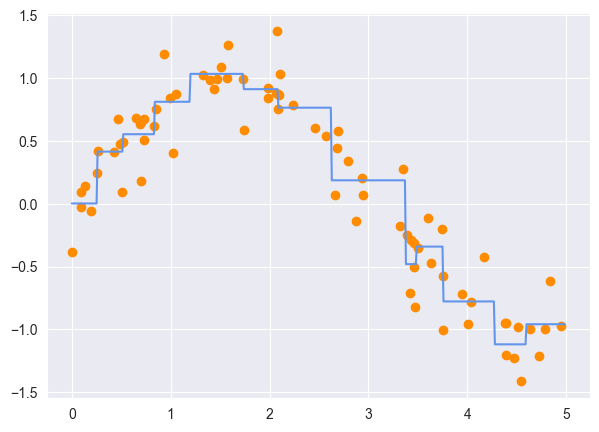

In [15]:
clf = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5).fit(X, y)
y_ = clf.predict(X_test)
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

В каких из этих трех случаев модель переобучилась? Почему?

-

Почему не воспроизводится результат DTC на параметрах по умолчанию?

-

# 2. Случайный лес: Random Forest Classification (Regression)

In [16]:
from sklearn.datasets import load_wine
wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,test_size=0.3, stratify=wine.target, random_state=42)

In [17]:
y_train

array([0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2,
       1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1,
       1, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1])

In [18]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [19]:
wine.data.shape

(178, 13)

In [20]:
log_reg = LogisticRegression(random_state=42) 
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 0.960
Accuracy on the test set: 0.981


In [21]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.963


In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state = 42, warm_start=True) 
rfc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(rfc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(rfc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.963


### Получилось 3 модели, точность на деревьях решений - "1.000" , т.е. лучший результат принадлежит RFC.

In [23]:
# посмотрим на выбранные характеристики модели
rfc.feature_importances_

array([0.13904712, 0.0257427 , 0.01384931, 0.00233003, 0.10582456,
       0.04661781, 0.27048422, 0.00524149, 0.01826678, 0.09521495,
       0.14404948, 0.07737182, 0.05595971])

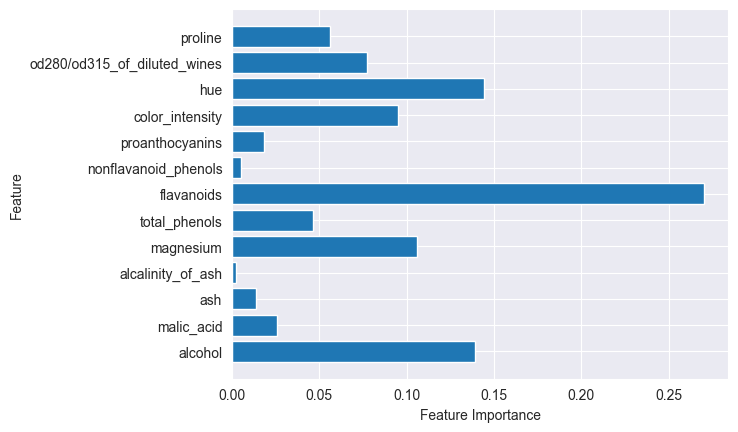

In [24]:
#График значимости признаков
n_feature = wine.data.shape[1]
plt.barh(range(n_feature), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), wine.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
#plt.ylim(1)
#plt.xlim(0.5)
plt.show()

### `feature_importances` в деревьях решений

In [25]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [26]:
rfc.feature_importances_

array([0.13904712, 0.0257427 , 0.01384931, 0.00233003, 0.10582456,
       0.04661781, 0.27048422, 0.00524149, 0.01826678, 0.09521495,
       0.14404948, 0.07737182, 0.05595971])

In [27]:
# создадим новый dataframe, чтобы с этими характеристиками было удобнее работать
data = pd.DataFrame(data = wine.data, columns =  wine.feature_names)

#### Корреляционный анализ:

<Axes: >

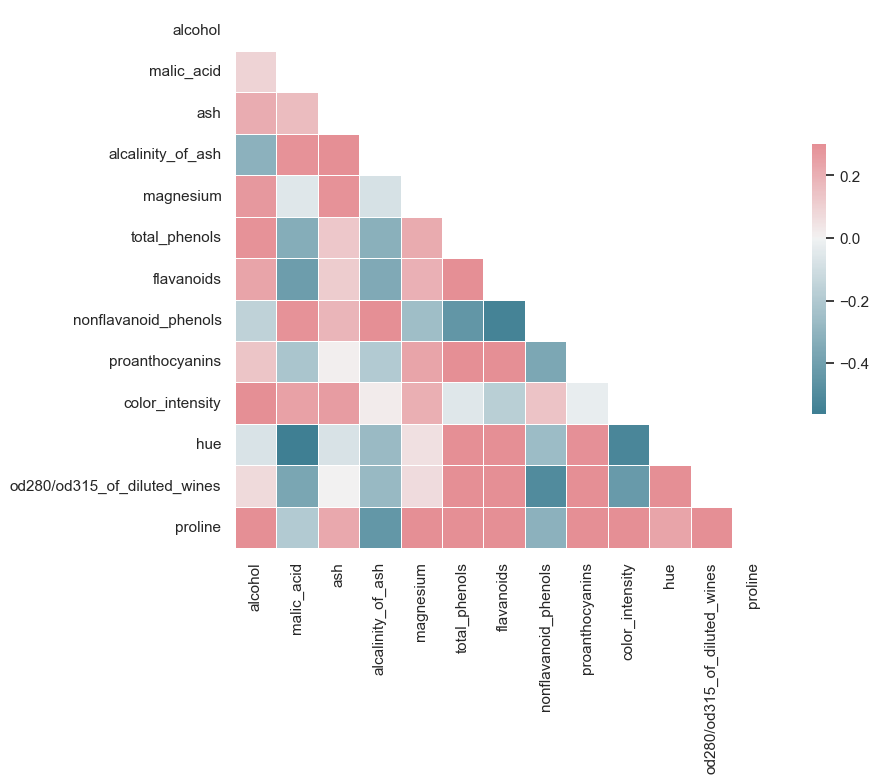

In [28]:
sns.set(style="white")

# Сгенерируйте большой случайный набор данных
rs = np.random.RandomState(33)
# Вычислите корреляционную матрицу
corr = data.corr()

# Сгенерируйте маску для верхнего треугольника
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Настройте фигуру matplotlib
f, ax = plt.subplots(figsize=(10, 7))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Нарисуйте тепловую карту с маской и правильным соотношением сторон
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
import scipy

scipy.stats.pearsonr(data['alcohol'], wine.target)

PearsonRResult(statistic=np.float64(-0.32822194089001944), pvalue=np.float64(7.723253314616391e-06))

### Выбор характеристик в наборе данных можно реализовать через SelectkBest

In [30]:
from sklearn.feature_selection import SelectKBest

##### По умолчанию используется функция `f_classif` - или ANOVA 
https://en.wikipedia.org/wiki/Analysis_of_variance

In [31]:
skb = SelectKBest(k = 5)

X = skb.fit_transform(wine.data, wine.target)

In [32]:
X.shape

(178, 5)

In [33]:
skb.scores_ 

array([135.07762424,  36.94342496,  13.3129012 ,  35.77163741,
        12.42958434,  93.73300962, 233.92587268,  27.57541715,
        30.27138317, 120.66401844, 101.31679539, 189.97232058,
       207.9203739 ])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.target, test_size=0.3, random_state=42, stratify=wine.target)

In [35]:
rfc = RandomForestClassifier(random_state=42) 
rfc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(rfc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(rfc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 1.000


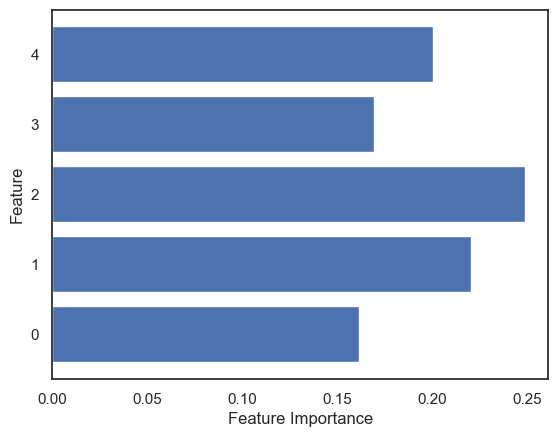

In [36]:
#График значимости признаков
n_feature = X_train.shape[1]
plt.barh(range(n_feature), rfc.feature_importances_, align='center')
#plt.yticks(np.arange(n_feature), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

###   Сравним точности двух классификаторов

In [37]:
from sklearn.model_selection import KFold

In [38]:
i = 0
list_ = []
kfold = KFold(n_splits = 10, random_state= 42, shuffle=True)
X = wine.data
y = wine.target

dtc = DecisionTreeClassifier()
for train_index, test_index in kfold.split(X_train, y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Fold #', i)
    i+=1
    dtc.fit(X_train,y_train)
    list_.append(dtc.score(X_test,y_test))
    print(dtc.score(X_test,y_test))    

Fold # 0
0.8461538461538461
Fold # 1
1.0
Fold # 2
1.0
Fold # 3
1.0
Fold # 4
0.9166666666666666
Fold # 5
1.0
Fold # 6
1.0
Fold # 7
1.0
Fold # 8
0.8333333333333334
Fold # 9
1.0


In [39]:
i = 0
list_1 = []
dtc = RandomForestClassifier()
for train_index, test_index in kfold.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Fold #', i)
    i+=1
    dtc.fit(X_train,y_train)
    list_1.append(dtc.score(X_test,y_test))
    print(dtc.score(X_test,y_test))   

Fold # 0
1.0
Fold # 1
1.0
Fold # 2
1.0
Fold # 3
1.0
Fold # 4
1.0
Fold # 5
0.8888888888888888
Fold # 6
1.0
Fold # 7
0.9444444444444444
Fold # 8
1.0
Fold # 9
1.0


In [40]:
np.mean(list_), np.std(list_)

(np.float64(0.9596153846153846), np.float64(0.06487040132282483))

In [41]:
np.mean(list_1), np.std(list_1)

(np.float64(0.9833333333333332), np.float64(0.035572912430182506))

In [42]:
import scipy

scipy.stats.ttest_rel(list_1,list_)

TtestResult(statistic=np.float64(0.8616164794395548), pvalue=np.float64(0.41126640274301596), df=np.int64(9))

### Вывод:

-

### **Задача 1.**  
Сравнить решающее правило Деревьев Решений и Случайных Лесов Решений для регрессионной задачи на выборке `sklearn.datasets.diabets`

In [43]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Загрузить набор данных
diabetes = datasets.load_diabetes()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

In [45]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [46]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [47]:
X_train.shape, X_test.shape

((309, 10), (133, 10))

In [48]:
y_test.max(), y_test.min()

(np.float64(310.0), np.float64(37.0))

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
y_train = scaler.fit_transform(pd.DataFrame(y_train))
y_test = scaler.transform(pd.DataFrame(y_test))

In [51]:
from sklearn.tree import DecisionTreeRegressor

dtc = DecisionTreeRegressor(random_state=42) 
dtc.fit( X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: -0.121


In [52]:
dtc.score(X_test,y_test)

-0.1206616885466063

In [53]:
from sklearn.ensemble import RandomForestRegressor

dtc = RandomForestRegressor(n_estimators=100, random_state=42) 
dtc.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the training set: 0.918
Accuracy on the test set: 0.469


## Задача 2. 
Мы уже знаем 4 принципиально разных классификатора: LR, KNN, SVC, RFC. 
Сравните их точности предсказания на наборе данных `breast cancer`. Используйте классификаторы с натройками по умолчанию. Разбейте данные на `train`  и  `test`.

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

random_state  = 42

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.svm import SVC
svc= SVC(kernel = 'linear')

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

random_state = 42
models = [knn, svc, rfc, lr]

for model in models:
    model.fit(X_train,y_train)
    ####
    ####

#### Исследуем лучшую модель:

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
pipe = Pipeline([('standardizer', scaler), ('svc', svc)])


search_space = [{'svc__C': [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'svc__kernel': ['linear', 'rbf','poly']}]

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_train, y_train)

In [59]:
clf.best_estimator_.score(X_test, y_test)

0.9766081871345029